In [1]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### The Bias Variance Tradeoff

Recall from 6.0 that in Machine Learning problems we assume the existence of function $f$ such that 

$$Y = f(X)+\epsilon$$

where $X = (X_1,X_2,...,X_N)$.  We use the training data to create $\hat{f}$ such that $\hat{f} \approx f$.

#### Bias

Intuitively, *bias* refers to the inability of a $\hat{f}$ to capture the true relationship given in $f$.

In [2]:
def poly_data(jump, up, down):
    X = np.linspace(-3, 3, num = 10**2)
    y = np.array([X[i]**3-3*X[i]+2+noise[i] for i in range(10**2)])
    for i in up:
        y[i] = y[i] + jump
    for i in down:
        y[i] = y[i] - jump
    return X, y

In [3]:
noise = 2.5*np.random.normal(size = (10**2,))+2

##### Example 1

Consider the following data set consisting of a single predictor $X$ and response $Y$.

In [4]:
X, y = poly_data(0, [0,2,4], [93, 95, 98])

In [5]:
data = pd.DataFrame(np.array([X, y]).T, columns = ['X', 'y'])

In [6]:
data.head()

,X,y
0,-3.000000,-14.252325
1,-2.939394,-7.753771
2,-2.878788,-8.571495
3,-2.818182,-11.455088
4,-2.757576,-5.697848


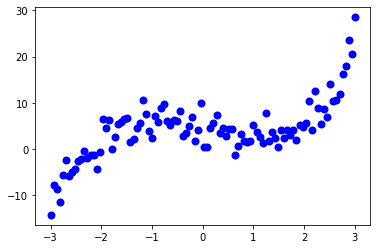

In [7]:
plt.scatter(X, y, color="blue", linewidth=2)

We train a linear model for this dataset.

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X.reshape(-1,1), y, test_size=0.25, random_state=250)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [10]:
beta_hat_0 = model.intercept_

In [11]:
beta_hat_1 = model.coef_[0]

In [12]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X_train)
model2 = LinearRegression()
model2.fit(poly_features, y_train)
y_pred2 = model2.predict(poly_features)

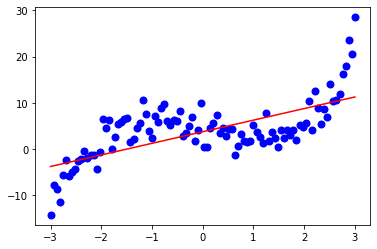

In [13]:
plt.scatter(X, y, color="blue", linewidth=2)
predicted_responses = np.array([beta_hat_1*x+beta_hat_0 for x in X])
plt.plot(X, predicted_responses, color = "red")

A one can see, our model does not capture the true relationship.

This is an example of a biased model.

$\Box$

#### Variance

A model is said to have high *variance* when its fit varies greatly from one training set to the next.

##### Example 2

In [14]:
X, y = poly_data(20, [0,2,4], [45, 47, 49, 51, 93, 95, 98])

In [15]:
data = pd.DataFrame(np.array([X, y]).T, columns = ['X', 'y'])

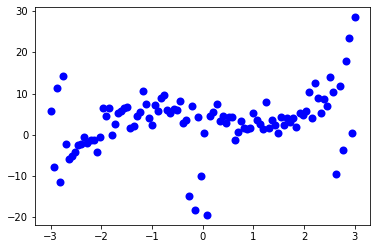

In [16]:
plt.scatter(X, y, color="blue", linewidth=2)

We train a polynomial model of degree 7 for our data.

In [17]:
train_indices_1 = list(np.random.choice(np.arange(5, 46), size = (35,), replace = False))+list(np.random.choice(np.arange(51, 93), size = (30,), replace = False))+[0,1,2,4,46,48,50,93,95,98]
train_indices_2 = list(np.random.choice(np.arange(5, 46), size = (35,), replace = False))+list(np.random.choice(np.arange(51, 93), size = (30,), replace = False))+[1,3,45, 47, 49, 51,94,96,97,99]

In [18]:
X_train_1 = data.iloc[train_indices_1, :1].to_numpy()
y_train_1 = data.iloc[train_indices_1, 1:2].to_numpy().ravel()
X_train_2 = data.iloc[train_indices_2, :1].to_numpy()
y_train_2 = data.iloc[train_indices_2, 1:2].to_numpy().ravel()

In [19]:
poly = PolynomialFeatures(degree=7, include_bias=False)

In [20]:
poly_features1 = poly.fit_transform(X_train_1)
poly_features2 = poly.fit_transform(X_train_2)

In [22]:
poly_reg_model1 = LinearRegression()
poly_reg_model2 = LinearRegression()

In [23]:
poly_reg_model1.fit(poly_features1, y_train_1)
poly_reg_model2.fit(poly_features2, y_train_2)

LinearRegression()

In [24]:
cept1 = poly_reg_model1.intercept_
cept2 = poly_reg_model2.intercept_

In [25]:
coef1 = list(poly_reg_model1.coef_)
coef2 = list(poly_reg_model2.coef_)

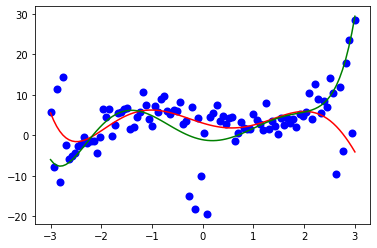

In [26]:
plt.scatter(X, y, color="blue", linewidth=2)
predicted_responses1 = np.array([cept1 + np.dot([x,x**2,x**3,x**4,x**5,x**6,x**7], coef1) for x in X])
predicted_responses2 = np.array([cept2 + np.dot([x,x**2,x**3,x**4,x**5,x**6,x**7], coef2) for x in X])
plt.plot(X, predicted_responses1, color = "red")
plt.plot(X, predicted_responses2, color = "green")

As we can see, our two models fit the data very differently.

$\Box$

#### Bias-Variance Tradeoff

Looking back at Example 1, we see that our model has low variance (why?).  Our models in Example 2 have low bias.  Examples 1 and 2 together form an example of the *Bias-Variance Tradeoff*.

See [this](https://www.geeksforgeeks.org/ml-bias-variance-trade-off/) article for a nice graph of this tradeoff.

#### Overfitting

When a model has high variance, it is said to *overfit* the data.  Overfitting is an issue because the model will not *generalize* well to new data.

##### Example 3

In [27]:
X, y = poly_data(20, [0,2,4], [45, 47, 49, 51, 93, 95, 98])

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X.reshape(-1,1), y, test_size=0.25, random_state=250)

In [29]:
poly = PolynomialFeatures(degree=4, include_bias=False)

In [30]:
poly_features = poly.fit_transform(X_train)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_train)

LinearRegression()

In [31]:
cept = poly_reg_model.intercept_
coef = list(poly_reg_model.coef_)

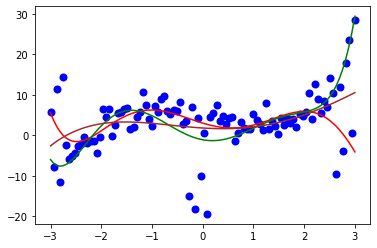

In [32]:
plt.scatter(X, y, color="blue", linewidth=2)
predicted_responses1 = np.array([cept1 + np.dot([x,x**2,x**3,x**4,x**5,x**6,x**7], coef1) for x in X])
predicted_responses2 = np.array([cept2 + np.dot([x,x**2,x**3,x**4,x**5,x**6,x**7], coef2) for x in X])
predicted_responses = np.array([cept + np.dot([x,x**2,x**3,x**4], coef) for x in X])
plt.plot(X, predicted_responses1, color = "red")
plt.plot(X, predicted_responses2, color = "green")
plt.plot(X, predicted_responses, color = "brown")